# Import libraries


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

!pip install --user statsmodels
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model

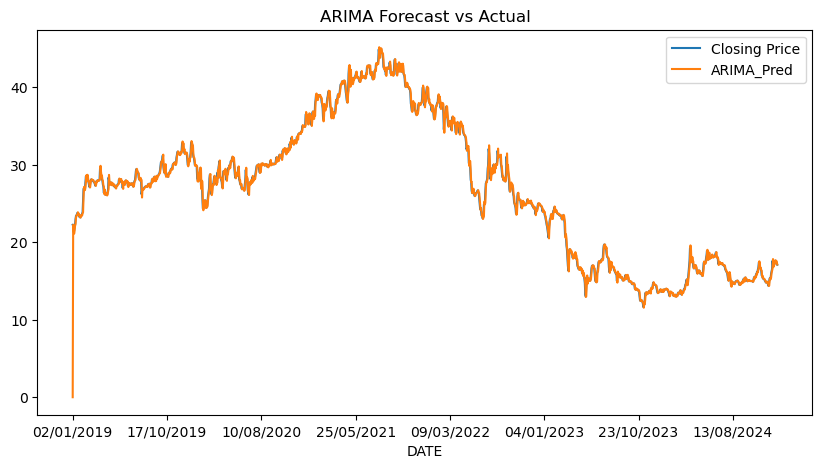

In [41]:

# Load and clean
df = pd.read_csv("SCOM data.csv", parse_dates=['DATE'], index_col='DATE')
df.columns = df.columns.str.strip() 

# Check available columns (optional debug)
# print(df.columns)

# Focus on Closing Price
df = df[['Closing Price']].dropna()

# Calculate returns
df['Returns'] = df['Closing Price'].pct_change()

# ARIMA modeling
model = ARIMA(df['Closing Price'], order=(1, 1, 1))
model_fit = model.fit()

# Forecast
df['ARIMA_Pred'] = model_fit.fittedvalues

# Plot
df[['Closing Price', 'ARIMA_Pred']].plot(figsize=(10, 5), title='ARIMA Forecast vs Actual')
plt.show()


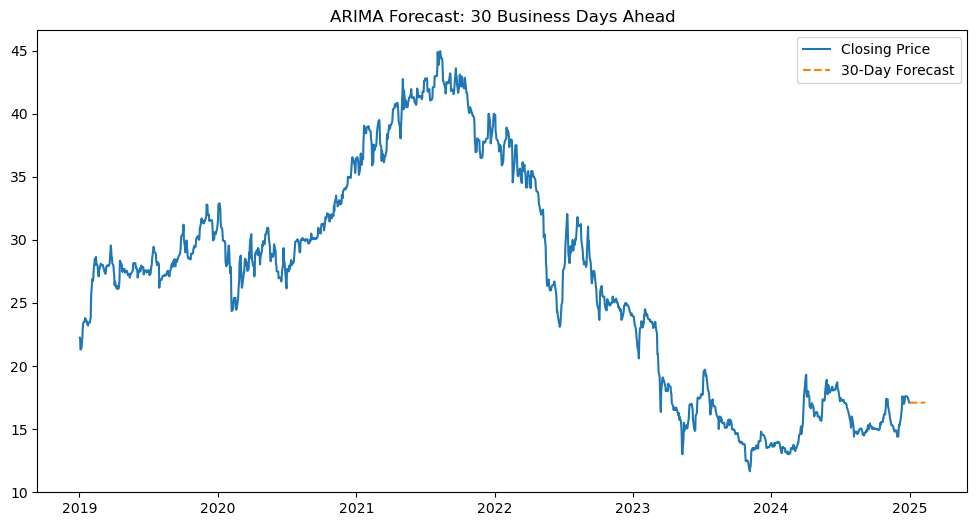

In [33]:
# Check if index is datetime, convert if needed
if not pd.api.types.is_datetime64_any_dtype(df.index):
    df.index = pd.to_datetime(df.index, dayfirst=True)

# Forecast
forecast = model_fit.forecast(steps=30)
forecast_index = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=30, freq='B')  # Business days
forecast.index = forecast_index

# Plot
df_forecast = pd.DataFrame({'Forecast': forecast})
plt.figure(figsize=(12, 6))
plt.plot(df['Closing Price'], label='Closing Price')
plt.plot(df_forecast['Forecast'], label='30-Day Forecast', linestyle='--')
plt.title('ARIMA Forecast: 30 Business Days Ahead')
plt.legend()
plt.show()


In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

# 1. Hold out the last 30 days
train = df['Closing Price'].iloc[:-30]
test = df['Closing Price'].iloc[-30:]


In [35]:
model = ARIMA(train, order=(1, 1, 1))  # Use the order that worked well for you
model_fit = model.fit()

In [36]:
forecast = model_fit.forecast(steps=30)

In [37]:
rmse = np.sqrt(mean_squared_error(test, forecast))
mape = mean_absolute_percentage_error(test, forecast) * 100

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


Root Mean Squared Error (RMSE): 1.32
Mean Absolute Percentage Error (MAPE): 6.13%


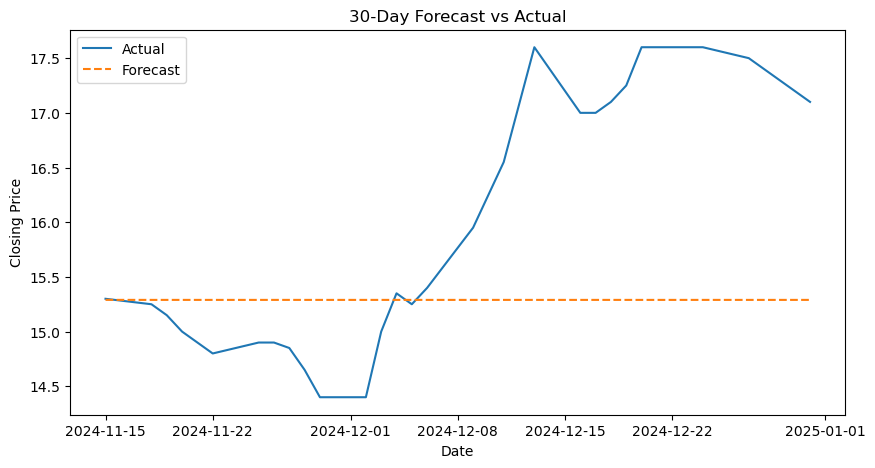

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Forecast', linestyle='--')
plt.title('30-Day Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()
